In [1]:
%%capture
try:
    import jaxopt
except ModuleNotFoundError:
    %pip install -qq jaxopt
    import jaxopt
try:
    import optax
except ModuleNotFoundError:
    %pip install -qq optax
    import optax
try:
    import flax
except ModuleNotFoundError:
    %pip install -qq flax
    import flax
import matplotlib.pyplot as plt
import seaborn as sns
import jax.numpy as jnp
import flax.linen as nn
import jax


from models import gmlp,MLP
from datasets import regression_data
from utility import gmlp_utils,mlp_utils


In [39]:
n_points = 400
X,y,y_true,x_test_1,y_test_1,x_test_2,y_test_2= regression_data.data_set(n_points=n_points,hetero=True,poly=False)

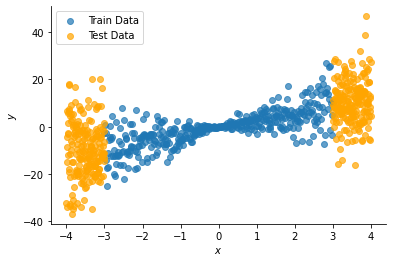

In [40]:
plt.scatter(X,y,label='Train Data',alpha=0.7)
plt.scatter(x_test_1,y_test_1,label='Test Data',alpha=0.7,color='orange')
plt.scatter(x_test_2,y_test_2,alpha=0.7,color='orange')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.legend()
sns.despine()

In [41]:
X_plot= jnp.linspace(-4,4,n_points)
X_plot = X_plot.reshape(n_points,1)

In [55]:
model = MLP.MLP([100])

In [43]:
theta = mlp_utils.fit(model,X,y,verbose=False)
mean= mlp_utils.predict(model,theta,X_plot)

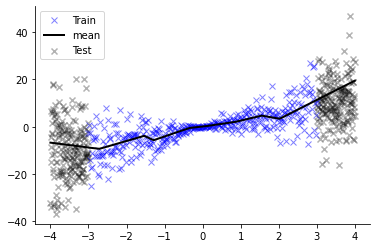

In [44]:
plt.plot(X,y,'x',alpha=0.5,color='blue',label='Train')
sns.despine()
plt.scatter(x_test_1,y_test_1,color='black',marker='x',alpha=0.3)
plt.scatter(x_test_2,y_test_2,color='black',marker='x',alpha=0.3,label='Test')
plt.plot(X_plot,mean,color='black',label='mean',linewidth=2)
plt.legend()

In [58]:
mean,sigma = mlp_utils.fit_ensemble(10,model,X,y,verbose=False)
mean = mean.reshape(n_points)
sigma = sigma.reshape(n_points)
sigma = sigma*1

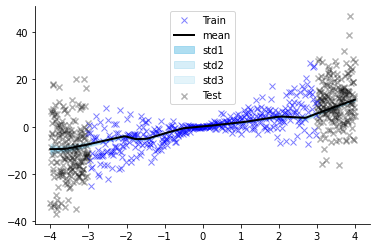

In [59]:
for i_std in range(1,4):
  plt.fill_between(X_plot.reshape(n_points), jnp.array((mean-i_std*sigma)), jnp.array((mean+i_std*sigma)), color='skyblue',alpha=2/(3*i_std), label='std'+str(i_std))
plt.plot(X,y,'x',alpha=0.5,color='blue',label='Train')
sns.despine()
plt.scatter(x_test_1,y_test_1,color='black',marker='x',alpha=0.3)
plt.scatter(x_test_2,y_test_2,color='black',marker='x',alpha=0.3,label='Test')
plt.plot(X_plot,mean,color='black',label='mean',linewidth=2)
plt.legend()

In [47]:
model = gmlp.GaussianMLP([100]) 


In [48]:
theta = gmlp_utils.fit(model,X,y,verbose=False)

In [49]:
mean,sigma = gmlp_utils.predict(model,theta,X_plot)


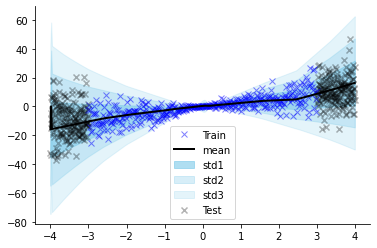

In [50]:
for i_std in range(1,4):
  plt.fill_between(X_plot.reshape(n_points), jnp.array((mean-i_std*sigma)), jnp.array((mean+i_std*sigma)), color='skyblue',alpha=2/(3*i_std), label='std'+str(i_std))
plt.plot(X,y,'x',alpha=0.5,color='blue',label='Train')
sns.despine()
plt.scatter(x_test_1,y_test_1,color='black',marker='x',alpha=0.3)
plt.scatter(x_test_2,y_test_2,color='black',marker='x',alpha=0.3,label='Test')
plt.plot(X_plot,mean,color='black',label='mean',linewidth=2)
plt.legend()

In [53]:
model = gmlp.GaussianMLP([100]) 
mean,sigma = gmlp_utils.fit_ensemble(10,model,X,y,verbose=False)

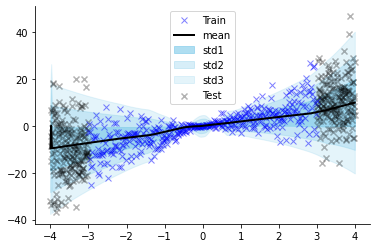

In [54]:
for i_std in range(1,4):
  plt.fill_between(X_plot.reshape(n_points), jnp.array((mean-i_std*sigma)), jnp.array((mean+i_std*sigma)), color='skyblue',alpha=2/(3*i_std), label='std'+str(i_std))
plt.plot(X,y,'x',alpha=0.5,color='blue',label='Train')
sns.despine()
plt.scatter(x_test_1,y_test_1,color='black',marker='x',alpha=0.3)
plt.scatter(x_test_2,y_test_2,color='black',marker='x',alpha=0.3,label='Test')
plt.plot(X_plot,mean,color='black',label='mean',linewidth=2)
plt.legend()